In [73]:
#importamos las librerías que se necesitarán usar a lo largo de todo el documento
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de Datos

1. Importar el conjunto de datos utilizando Pandas.
2. ¿Cuántas filas y columnas tiene el dataset?
3. ¿Qué atributos presenta el dataset y qué describen? ¿Qué tipos de datos tiene cada atributo?
4. Verifica la consistencia de los tipos de datos y realizar conversiones si es necesario.
5. ¿Existen valores faltantes en algunos atributos? ¿Cuáles son las tres columnas con más valores faltantes y cuál es el porcentaje de valores faltantes en cada una?
6. Para las columnas numéricas, obtener métricas de estadística descriptiva (media, mediana y cuartiles). Hint: usa el método .describe().

In [2]:
# 1) Importar el conjunto de datos utilizando Pandas.
df = pd.read_csv(r'C:\Users\juan.yunes\Desktop\Personal\weatherAUS.csv')

# Miro que viene
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
print('¿Cuántas filas y columnas tiene el dataset?')
#print(df.shape)
print('cantidad de filas: ' + str(df.shape[0]))
print('cantidad de columnas: ' + str(df.shape[1]) + '\n')

print('¿Qué atributos presenta el dataset y qué describen? ¿Qué tipos de datos tiene cada atributo?')
desc = ['The date of observation',
        'The common name of the location of the weather station',
        'The minimum temperature in degrees celsius',
        'The maximum temperature in degrees celsius',
        'The amount of rainfall recorded for the day in mm',
        'The so-called Class A pan evaporation (mm) in the 24 hours to 9am',
        'The number of hours of bright sunshine in the day.',
        'The direction of the strongest wind gust in the 24 hours to midnight',
        'The speed (km/h) of the strongest wind gust in the 24 hours to midnight',
        'Direction of the wind at 9am',
        'Direction of the wind at 3pm',
        'Wind speed (km/hr) averaged over 10 minutes prior to 9am',
        'Wind speed (km/hr) averaged over 10 minutes prior to 3pm',
        'Humidity (percent) at 9am',
        'Humidity (percent) at 3pm',
        'Atmospheric pressure (hpa) reduced to mean sea level at 9am',
        'Atmospheric pressure (hpa) reduced to mean sea level at 3pm',
        'Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how', 
        'Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values',
        'Temperature (degrees C) at 9am',
        'Temperature (degrees C) at 3pm',         
        'Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0',
        'The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".']

print('Verifico la consistencia de los tipos de datos y realizar conversiones si es necesario.')
descripcion = pd.DataFrame({'atributos': df.columns, 'tipo':df.dtypes, 'descripción':desc}).reset_index(drop=True)
print (descripcion)
print('\n')

print(df.columns)
print('\n')

print(df.dtypes)
print('\n')

print('Modifico el tipo de dato del campo "Date". Este cambia de object a datetime')
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)
print('\n')

print('¿Existen valores faltantes en algunos atributos? ¿Cuáles son las tres columnas con más valores faltantes y cuál es el porcentaje de valores faltantes en cada una?')
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

# Definir una función para convertir a porcentaje y formatear
def a_porcentaje(x):
    return "{:.2f}%".format(x)

# Aplicar la función a los tres valores con más valores faltantes
top_missing = missing_percentage.sort_values(ascending=False).head(3).apply(a_porcentaje)
print('Si, existen valores faltantes. Las 3 columnas con más valores faltantes son:\n')
print(top_missing)

print('\n')
print('Para las columnas numéricas, obtengo métricas de estadística descriptiva (media, mediana y cuartiles). Hint: usa el método .describe().\n')
numeric_stats = df.describe().T[['mean', '50%', '25%', '75%']]  
print(numeric_stats)

¿Cuántas filas y columnas tiene el dataset?
cantidad de filas: 145460
cantidad de columnas: 23

¿Qué atributos presenta el dataset y qué describen? ¿Qué tipos de datos tiene cada atributo?
Verifico la consistencia de los tipos de datos y realizar conversiones si es necesario.
        atributos     tipo                                        descripción
0            Date   object                            The date of observation
1        Location   object  The common name of the location of the weather...
2         MinTemp  float64         The minimum temperature in degrees celsius
3         MaxTemp  float64         The maximum temperature in degrees celsius
4        Rainfall  float64  The amount of rainfall recorded for the day in mm
5     Evaporation  float64  The so-called Class A pan evaporation (mm) in ...
6        Sunshine  float64  The number of hours of bright sunshine in the ...
7     WindGustDir   object  The direction of the strongest wind gust in th...
8   WindGustSpeed  fl

# Limpieza y Preprocesamiento de Datos

Existen diversas formas de manejar los datos faltantes. La más sencilla implica eliminar las observaciones con valores faltantes, pero esto puede resultar en la pérdida de una cantidad significativa de datos. Otra estrategia consiste en completar los valores utilizando estadísticas descriptivas. Sin embargo, dado que estamos trabajando con series de tiempo correspondientes a diferentes ciudades y considerando la naturaleza estacional del clima, podemos emplear un enfoque más sofisticado. Para aprovechar la estacionalidad del clima, una técnica efectiva es propagar la última observación válida hacia la siguiente. Esta metodología asume que las condiciones climáticas cambian gradualmente día a día (aunque es cierto que pueden haber cambios abruptos en ciertos días, la premisa es que los días de una misma estación son relativamente similares).

1. Ordene el dataset por ciudad y fecha de forma ascendente.
2. Complete los valores faltantes de todas las columnas menos RainToday, RainTomorrow, Cloud9am y Cloud3pm usando FowardFill.
3. Modifique en las columnas RainToday y RainTomorrow reemplazando Yes con 1 y No con 0.
4. Según el dataset, la columna RainToday se define como 1 si Rainfall supera los 1 mm, sino es 0. Utilice esta información para completar los datos faltantes de la columna RainToday.
5. Complete los valores faltantes de las columnas Cloud9am y Cloud3pm usando la mediana de cada una por ciudad.
6. Elimine del dataset la primera fecha de cada ciudad.

In [4]:
print('1) Ordeno el dataset por ciudad y fecha de forma ascendente.')
df = df.sort_values(by=['Location', 'Date']).reset_index(drop=True)
print(df.iloc[0:5,:])
print('\n')

print('2) Completo los valores faltantes de todas las columnas menos RainToday, RainTomorrow, Cloud9am y Cloud3pm usando ForwardFill.')
columns_to_fill = df.columns.difference(['RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm'])
df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')
print(df.iloc[0:5,:])
print('\n')

print('3) Modifico RainToday y RainTomorrow reemplazando Yes con 1 y No con 0.')
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
print(df.iloc[0:5,:])
print('\n')

print('4) Completo los datos faltantes de RainToday con 1 si Rainfall supera los 1 mmo o con 0 de lo contratio.')
df['RainToday'].fillna((df['Rainfall'] > 1).astype(int), inplace=True)
print(df.iloc[0:5,:])
print('\n')

print('5) Completo los valores faltantes de las columnas Cloud9am y Cloud3pm usando la mediana por ciudad.')
print('IMPORTANTE: Hay ciudades cuyas filas permacereán vacías para estos campos, por no tenermediciones medición para ninguna fecha.')
df['Cloud9am'] = df.groupby('Location')['Cloud9am'].transform(lambda x: x.fillna(x.median()))
df['Cloud3pm'] = df.groupby('Location')['Cloud3pm'].transform(lambda x: x.fillna(x.median()))
print(df.iloc[0:5,:])
print('\n')

print('6) Elimino la primera fecha de cada ciudad.')
df = df[df.duplicated(subset=['Location'], keep='first')]
print(df.iloc[0:5,:])
print('\n')


# Guardo el dataset
df.to_csv('./weatherAUS_clean.csv', index=False)

df.head()


1) Ordeno el dataset por ciudad y fecha de forma ascendente.
        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-07-01  Adelaide      8.8     15.7       5.0          1.6       2.6   
1 2008-07-02  Adelaide     12.7     15.8       0.8          1.4       7.8   
2 2008-07-03  Adelaide      6.2     15.1       0.0          1.8       2.1   
3 2008-07-04  Adelaide      5.3     15.9       0.0          1.4       8.0   
4 2008-07-05  Adelaide      9.8     15.4       0.0          NaN       0.9   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0          NW           48.0         SW  ...        92.0         67.0   
1          SW           35.0        SSW  ...        75.0         52.0   
2           W           20.0        NNE  ...        81.0         56.0   
3         NNE           30.0        NNE  ...        71.0         46.0   
4           N           30.0        NNE  ...        56.0         67.0   

   Pressure9am  Pressure3pm  Cloud9am

        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
1 2008-07-02  Adelaide     12.7     15.8       0.8          1.4       7.8   
2 2008-07-03  Adelaide      6.2     15.1       0.0          1.8       2.1   
3 2008-07-04  Adelaide      5.3     15.9       0.0          1.4       8.0   
4 2008-07-05  Adelaide      9.8     15.4       0.0          1.4       0.9   
5 2008-07-06  Adelaide     11.3     15.7       0.0          1.4       1.5   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
1          SW           35.0        SSW  ...        75.0         52.0   
2           W           20.0        NNE  ...        81.0         56.0   
3         NNE           30.0        NNE  ...        71.0         46.0   
4           N           30.0        NNE  ...        56.0         67.0   
5         NNW           52.0        NNE  ...        62.0         62.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
1       1022.4    

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,0.0,0.0
2,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,0.0,0.0
3,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,0.0,0.0
4,2008-07-05,Adelaide,9.8,15.4,0.0,1.4,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,0.0,NaN
5,2008-07-06,Adelaide,11.3,15.7,0.0,1.4,1.5,NNW,52.0,NNE,...,62.0,62.0,1019.5,1016.2,NaN,NaN,13.0,14.4,0.0,1.0


# Análisis Exploratorio de Datos:
En esta sección se realizará un análisis exploratorio de los datos para obtener insights sobre el conjunto de datos.

1. Obtenga el top 5 de mayor temperatura media y el top 5 de menor temperatura media.
2. Repita el proceso para la temperatura a las 3pm. ¿Son las mismas ciudades las que aparecen en ambos tops?
3. ¿Cuál es la ciudad que registró la mayor cantidad de precipitación en un solo día? ¿Cuánto mm de lluvia se registró?
4. ¿Cuál es la ciudad con la menor cantidad de lluvias registradas?
5. Para las 10 ciudades obtenidas en el punto 1, calcule la dirección del viento más fuerte que más veces ocurrió.
6. ¿Cuál es la ciudad que experimentó la mayor amplitud térmica en un solo día? ¿Y cuál es la ciudad que, en promedio, presenta la mayor amplitud térmica diaria?
7. Calcule la correlación entre RainTomorrow y todos los atributos. ¿Cuáles tienen mayor correlación?

In [76]:
# Obtengo el top 5 de mayor temperatura media y el top 5 de menor temperatura media
top_5_media_de_MaxTemp = df.groupby('Location')['MaxTemp'].mean().nlargest(5)
top_5_media_de_MinTemp = df.groupby('Location')['MinTemp'].mean().nsmallest(5).sort_values(ascending=False)
print('Las 5 locaciones con mayor temperatura media son:')
print(top_5_media_de_MaxTemp)
print('\n')
print('Las 5 locaciones con menor temperatura media son:')
print(top_5_media_de_MinTemp)
print('\n')

# Repito pero esta vez considerando el campo Temp3pm
top_5_max_media_de_Temp3pm = df.groupby('Location')['Temp3pm'].mean().nlargest(5)
top_5_min_media_de_Temp3pm = df.groupby('Location')['Temp3pm'].mean().nsmallest(5).sort_values(ascending=False)
print('Las 5 locaciones con mayor promedio de temperatura a las 3pm son:')
print(top_5_max_media_de_Temp3pm)
print('\n')
print('Las 5 locaciones con menor promedio de temperatura a las 3pm son:')
print(top_5_min_media_de_Temp3pm)
print('\n')

# Busco cuál es la ciudad que registró la mayor cantidad de precipitación en un solo día y cuántos mm de lluvia se registraron
max_precip = df.loc[df['Rainfall'].idxmax()]
location_max_precip = max_precip['Location']
mm_max_precip = max_precip['Rainfall']
print('Ciudad con mayor precipitación en un sólo día: ' + location_max_precip)
print('rainfall_max_precip: ' + mm_max_precip.astype(str) + ' mm' + '\n')

# Busco la ciudad con la menor cantidad de lluvias registradas
location_min_precip = df.groupby('Location')['Rainfall'].sum().idxmin()
mm_min_precip = df.groupby('Location')['Rainfall'].sum().min()
print('Ciudad con menor cantidad de lluvias registradas: ' + location_min_precip)
print('rainfall_min_precip: ' + str(mm_min_precip)   + ' mm' + '\n')

# Para las 10 ciudades obtenidas en el punto 1, calcule la dirección del viento más fuerte que más veces ocurrió.
top_10_locations = pd.Series((top_5_media_de_MaxTemp + top_5_media_de_MinTemp).index)
wind_direction_counts = df[df['Location'].isin(top_10_locations)].groupby('Location')['WindGustDir'].agg(lambda x: x.value_counts().idxmax())
print(wind_direction_counts)
print('\n')

# ¿Cuál es la ciudad que experimentó la mayor amplitud térmica en un solo día?
# ¿Y cuál es la ciudad que, en promedio, presenta la mayor amplitud térmica diaria?
df['AmplitudTemp'] = df['MaxTemp'] - df['MinTemp']
df['AmplitudTemp'] = df['AmplitudTemp'].round(2)
max_amplitud_temp_location = df.loc[df['AmplitudTemp'].idxmax()]['Location']
max_amplitud_temp = df['AmplitudTemp'].max()
print('La ciudad que experimentó mayor amplitud térmica es '+ max_amplitud_temp_location + ' con ' + str(max_amplitud_temp) + '°C' )

media_amplitud_temp_location = df.groupby('Location')['AmplitudTemp'].mean().idxmax()
media_temp_range = df.groupby('Location')['AmplitudTemp'].mean().round(2).max()
print('Y la ciudad que, en promedio, presenta la mayor amplitud térmica diaria es ' + media_amplitud_temp_location + ' con ' + str(media_temp_range) +'°C')
print('\n')

#tiro la columna que creé
df = df.drop('AmplitudTemp', axis=1)

# Calcule la correlación entre RainTomorrow y todos los atributos. ¿Cuáles tienen mayor correlación?
# Para este punto voy a hacer una copia del df que no contará con las locations Nhil, SalmonGums, Adelaide, Dartmoor, BadgerysCreek, Tuggeranong, Penrith, Witchcliffe, Walpole, MountGinini, NorahHead, GoldCoast porque le falten datos de los campos Cloud9am, Cloud3pm
# y tampoco trendrá las locations Melbourne, Williamtown, PearceRAAF, Walpole, Moree, MountGinini, RainTomorrow porque tienen más de un 4% de casos donde no hay información para el campo RainTomorrow
# Nota de color: las locations Walpole y MountGinini figuran en ambos grupos.
LocationsBlacklist = ['SalmonGums','Adelaide','Dartmoor','BadgerysCreek','Tuggeranong','Penrith','Witchcliffe','Walpole','MountGinini','NorahHead','GoldCoast','Williamtown','PearceRAAF','Moree','RainTomorrow']
df_thin = df.loc[~df['Location'].isin(LocationsBlacklist)]
correlations = df.corr()['RainTomorrow'].sort_values(ascending=False)
print('Correlación entre RainTomorrow y resto de los campos:')
print(correlations)

Las 5 locaciones con mayor temperatura media son:
Location
Katherine     34.936081
Darwin        32.540539
Uluru         30.400063
Cairns        29.557947
Townsville    29.365614
Name: MaxTemp, dtype: float64


Las 5 locaciones con menor temperatura media son:
Location
Launceston     7.832346
Ballarat       7.371306
Tuggeranong    7.238776
Canberra       6.831092
MountGinini    3.532445
Name: MinTemp, dtype: float64


Las 5 locaciones con mayor promedio de temperatura a las 3pm son:
Location
Katherine       32.410399
Darwin          31.082362
Uluru           29.060241
AliceSprings    28.012274
Cairns          27.908193
Name: Temp3pm, dtype: float64


Las 5 locaciones con menor promedio de temperatura a las 3pm son:
Location
Albany         17.403027
Ballarat       16.792827
Portland       16.527394
Hobart         16.173246
MountGinini    10.059164
Name: Temp3pm, dtype: float64


Ciudad con mayor precipitación en un sólo día: CoffsHarbour
rainfall_max_precip: 371.0 mm

Ciudad con menor c

# Visualización de Datos

En esta sección se busca que se realicen visualizaciones que acompañen adecuadamente el análisis de datos, utilizando gráficos bien diseñados con colores apropiados, ejes etiquetados, leyendas claras y tamaños adecuados.

1. De las 10 ciudades obtenidas del punto 1 del Análisis Exploratorio de Datos, grafique la temperatura a las 3pm a lo largo del tiempo. ¿Se observa estacionalidad?
2. Realice el mismo proceso para la columna RainToday. ¿Se observa estacionalidad en la incidencia de lluvia?
3. Para la ciudad de Sydney, trace en un mismo gráfico todas las series temporales de temperatura entre los años 2012 y 2014.
4. Para las ciudades del punto 1 del Análisis Exploratorio de Datos, genere un diagrama de caja comparativo para WindSpeed9am y otro para MaxTemp.
5. Para las ciudades del punto 3 y 4 del Análisis Exploratorio de Datos, cree un diagrama de barras que muestre la cantidad de Rainfall por año.
6. Realice un gráfico de dispersión entre WindGustSpeed y Pressure9am para las ciudades del punto 1. Coloree los puntos según la variable RainToday.
7. Realice un gráfico de dispersión entre MaxTemp y Humidity9am para las ciudades del punto 1. Coloree los puntos según la variable RainToday.

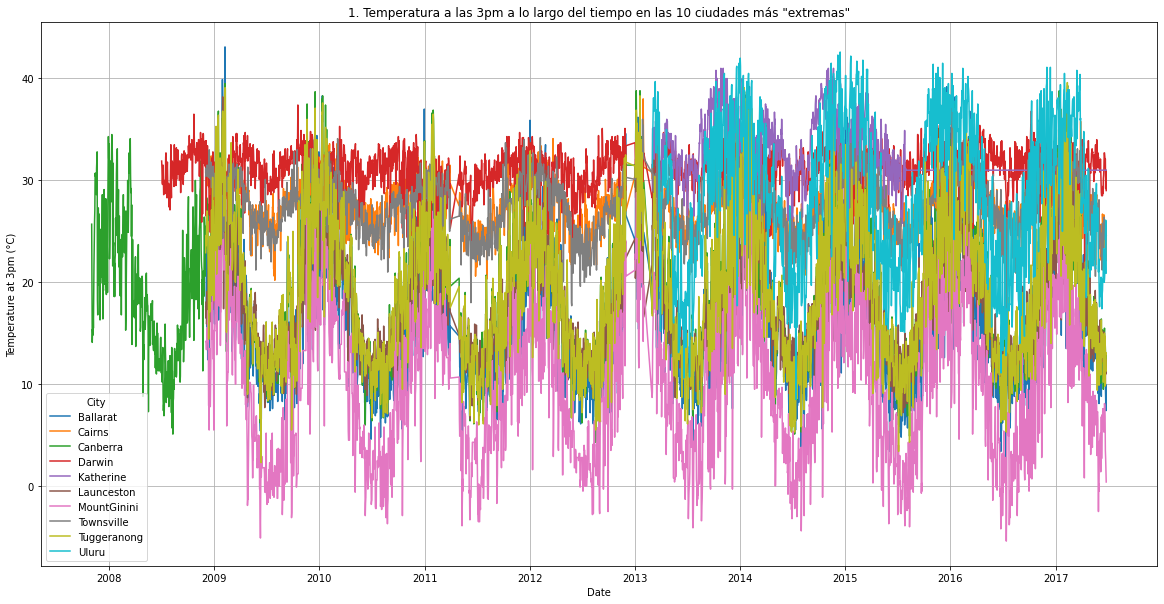

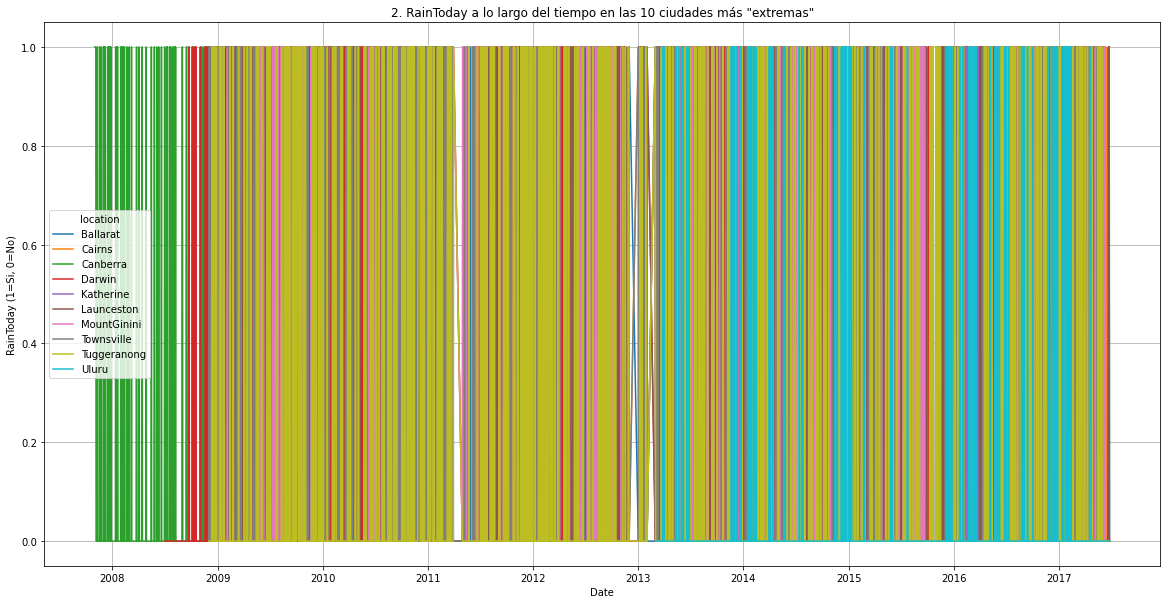

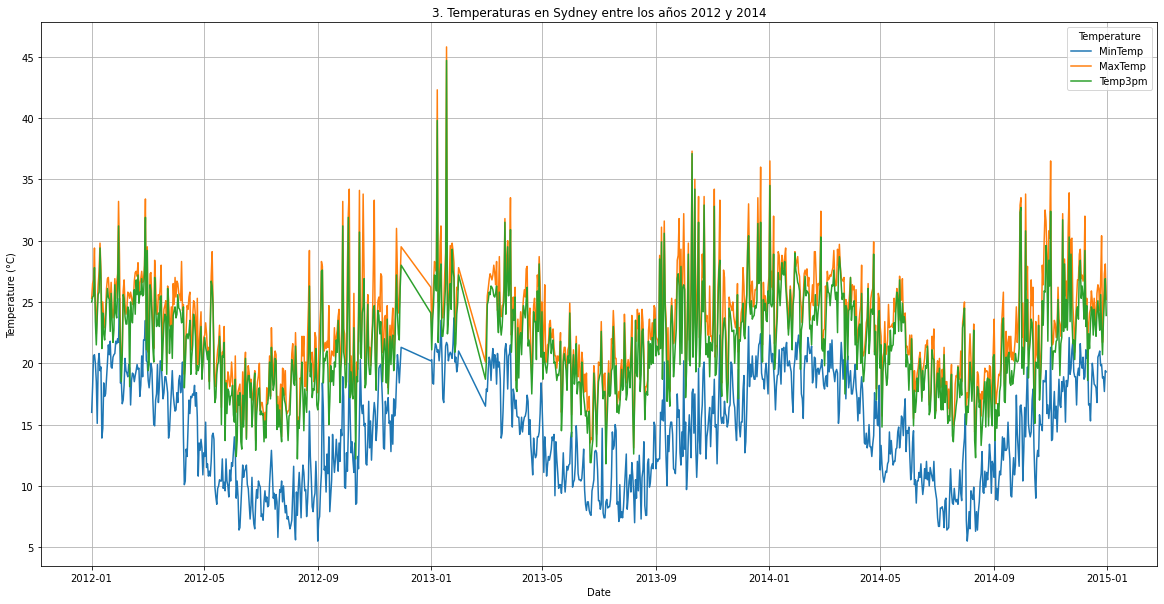

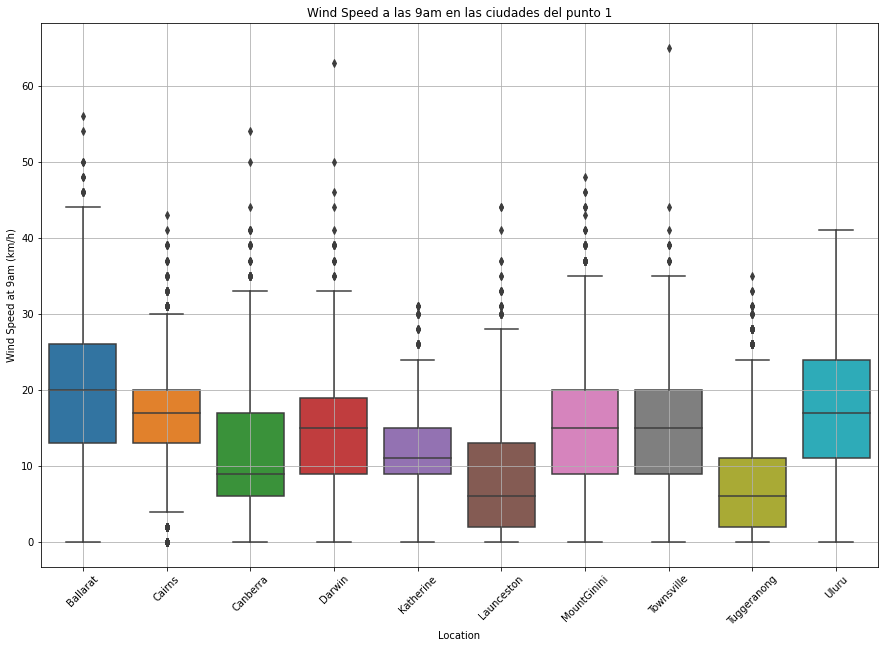

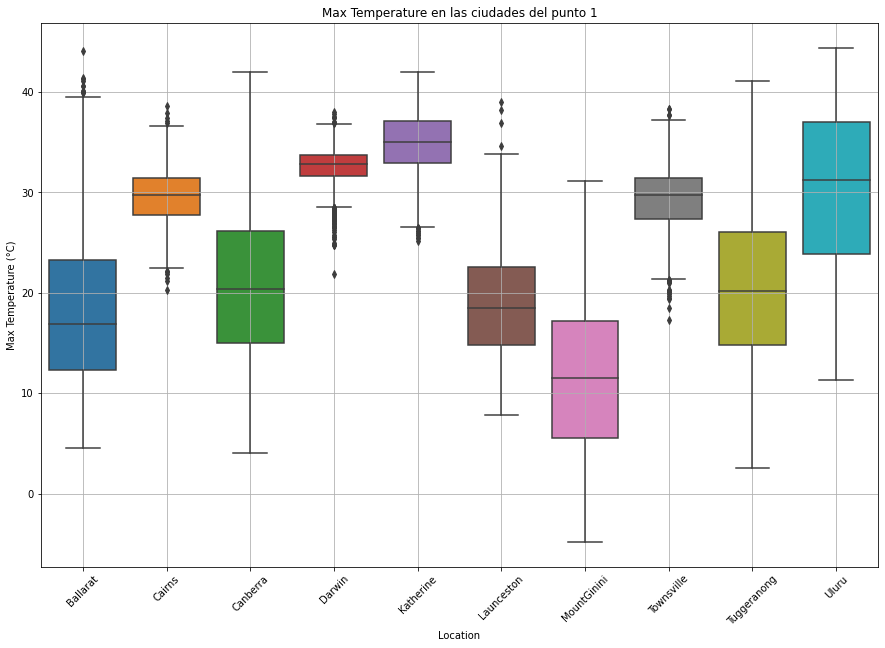

C:\Users\juan.yunes\AppData\Local\Temp\ipykernel_66652\629297493.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rainfall['Año'] = df_rainfall['Date'].dt.year


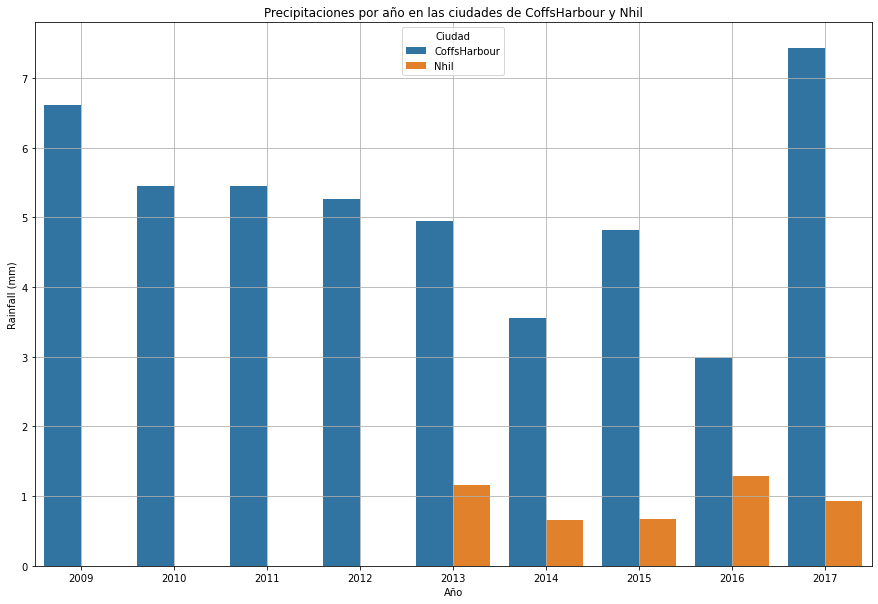

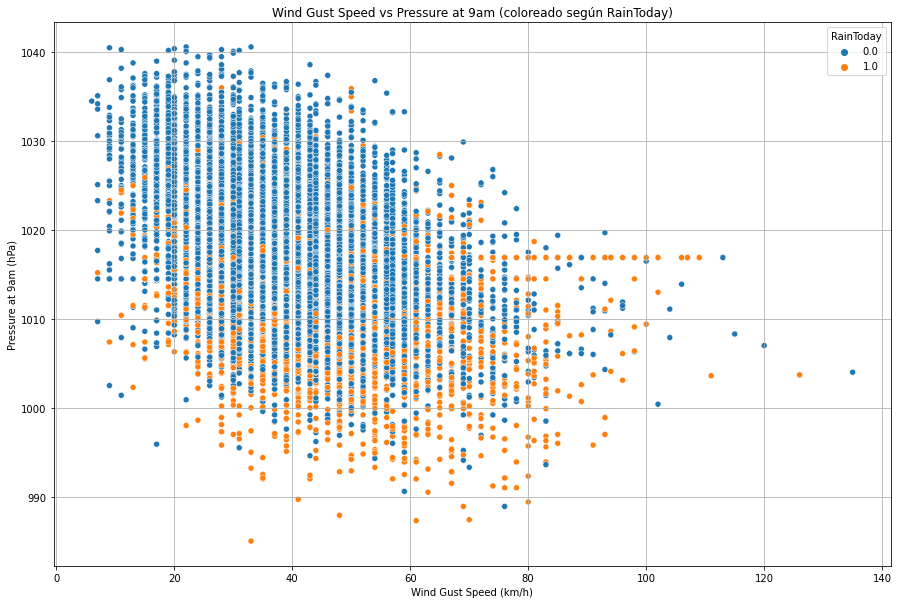

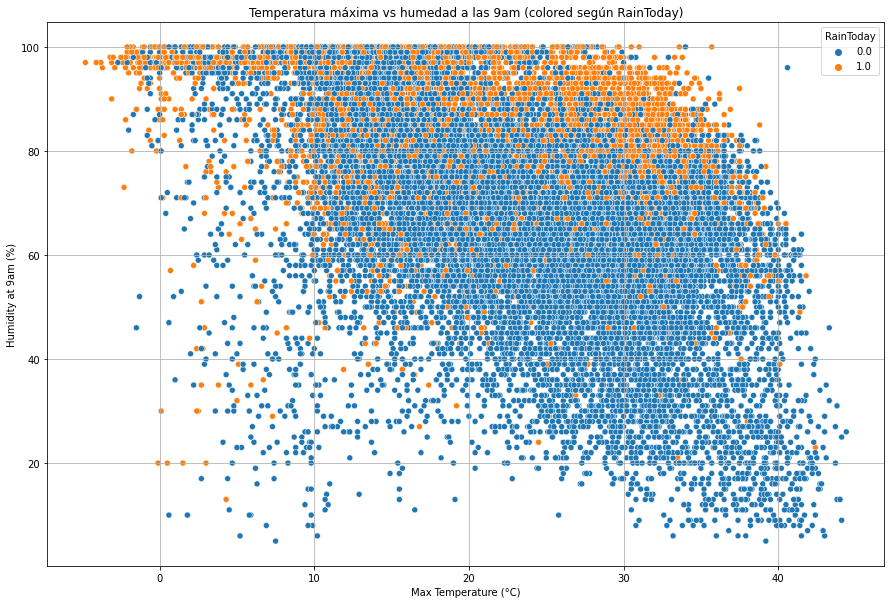

In [103]:
# 1. Graficar la temperatura a las 3pm a lo largo del tiempo para las 10 ciudades con mayor temperatura media
df_top_10_locations = df[df['Location'].isin(top_10_locations)]

plt.figure(figsize=(20, 10))

for location in top_10_locations:
    location_data = df_top_10_locations[df_top_10_locations['Location'] == location]
    plt.plot(location_data['Date'], location_data['Temp3pm'], label=location)

plt.xlabel('Date')
plt.ylabel('Temperature at 3pm (°C)')
plt.title('1. Temperatura a las 3pm a lo largo del tiempo en las 10 ciudades más "extremas"')
plt.legend(title='City')
plt.grid(True)
plt.show()

# 2. Realizar el mismo proceso para la columna RainToday. ¿Se observa estacionalidad en la incidencia de lluvia?
plt.figure(figsize=(20, 10))
for location in top_10_locations:
    location_data = df_top_10_locations[df_top_10_locations['Location'] == location]
    plt.plot(location_data['Date'], location_data['RainToday'], label=location)

plt.xlabel('Date')
plt.ylabel('RainToday (1=Si, 0=No)')
plt.title('2. RainToday a lo largo del tiempo en las 10 ciudades más "extremas"')
plt.legend(title='location')
plt.grid(True)
plt.show()

# 3. Series temporales de temperatura para Sydney entre 2012 y 2014
sydney_data = df[(df['Location'] == 'Sydney') & (df['Date'].dt.year >= 2012) & (df['Date'].dt.year <= 2014)]
plt.figure(figsize=(20, 10))
plt.plot(sydney_data['Date'], sydney_data['MinTemp'], label='MinTemp')
plt.plot(sydney_data['Date'], sydney_data['MaxTemp'], label='MaxTemp')
plt.plot(sydney_data['Date'], sydney_data['Temp3pm'], label='Temp3pm')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('3. Temperaturas en Sydney entre los años 2012 y 2014')
plt.legend(title='Temperature')
plt.grid(True)
plt.show()

# 4. Diagrama de caja comparativo para WindSpeed9am y MaxTemp en las ciudades del punto 1
plt.figure(figsize=(15, 10))
sns.boxplot(x='Location', y='WindSpeed9am', data=df_top_10_locations)
plt.xlabel('Location')
plt.ylabel('Wind Speed at 9am (km/h)')
plt.title('Wind Speed a las 9am en las ciudades del punto 1')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='Location', y='MaxTemp', data=df_top_10_locations)
plt.xlabel('Location')
plt.ylabel('Max Temperature (°C)')
plt.title('Max Temperature en las ciudades del punto 1')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Diagrama de barras de Rainfall por año para las ciudades de CoffsHarbour y Nhil
ciudades3y4 = df['Location'].isin(['CoffsHarbour','Nhil'])
df_rainfall = df[ciudades3y4]
df_rainfall['Año'] = df_rainfall['Date'].dt.year

plt.figure(figsize=(15, 10))
sns.barplot(x='Año', y='Rainfall', hue='Location', data=df_rainfall, ci=None)
plt.xlabel('Año')
plt.ylabel('Rainfall (mm)')
plt.title('Precipitaciones por año en las ciudades de CoffsHarbour y Nhil')
plt.legend(title='Ciudad')
plt.grid(True)
plt.show()

# 6. Gráfico de dispersión entre WindGustSpeed y Pressure9am, coloreado por RainToday
plt.figure(figsize=(15, 10))
sns.scatterplot(x='WindGustSpeed', y='Pressure9am', hue='RainToday', data=df_top_10_cities)
plt.xlabel('Wind Gust Speed (km/h)')
plt.ylabel('Pressure at 9am (hPa)')
plt.title('Wind Gust Speed vs Pressure at 9am (coloreado según RainToday)')
plt.grid(True)
plt.show()

# 7. Gráfico de dispersión entre MaxTemp y Humidity9am para las ciudades del punto 1, coloreado por RainToday
plt.figure(figsize=(15, 10))
sns.scatterplot(x='MaxTemp', y='Humidity9am', hue='RainToday', data=df_top_10_locations)
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Humidity at 9am (%)')
plt.title('Temperatura máxima vs humedad a las 9am (colored según RainToday)')
plt.grid(True)
plt.show()

# Conclusiones
Resumir los hallazgos más relevantes obtenidos del análisis de datos.
Guarde el dataset limpio y ordenado para siguientes TPs en un csv, previo al guardado, elimina todas las filas que tienen datos incompletos de RainTomorrow.